In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

In [2]:
# Load Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target
# Use only two features for simplicity
X = X[:, :2]
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
random_state=42)

In [3]:
# Create a SVM Classifier
model = SVC(kernel='linear')
# Train the model using the training sets
model.fit(X_train, y_train)

SVC(kernel='linear')

In [4]:
# Predict the response for test dataset
y_pred = model.predict(X_test)
# Print classification report and accuracy
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.70      0.54      0.61        13
           2       0.62      0.77      0.69        13

    accuracy                           0.80        45
   macro avg       0.78      0.77      0.77        45
weighted avg       0.81      0.80      0.80        45

Accuracy: 0.8


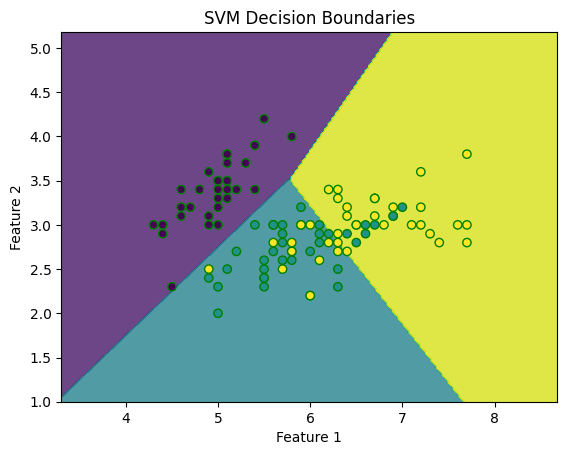

In [5]:
# Function to plot decision boundaries
def plot_decision_boundaries(X, y, model):
 h = .02 # step size in the mesh
 x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
 y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
 xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min,
y_max, h))
 Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
 Z = Z.reshape(xx.shape)
 plt.contourf(xx, yy, Z, alpha=0.8)
 plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='g')
 plt.xlabel('Feature 1')
 plt.ylabel('Feature 2')
 plt.title('SVM Decision Boundaries')
 plt.show()

# Plot decision boundaries
plot_decision_boundaries(X_train, y_train, model)

In [6]:
# Kernel types to experiment with
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
# Results dictionary to store accuracy for each kernel
results = {}
for kernel in kernels:
 # Create a SVM Classifier with different kernels
 svm_model = SVC(kernel=kernel)

 # Train the model using the training sets
 svm_model.fit(X_train, y_train)

 # Predict the response for test dataset
 y_pred = svm_model.predict(X_test)

 # Store accuracy in the dictionary
 results[kernel] = accuracy_score(y_test, y_pred)
 print(f"Kernel: {kernel} - Accuracy: {results[kernel]}")

Kernel: linear - Accuracy: 0.8
Kernel: poly - Accuracy: 0.7333333333333333
Kernel: rbf - Accuracy: 0.8
Kernel: sigmoid - Accuracy: 0.28888888888888886


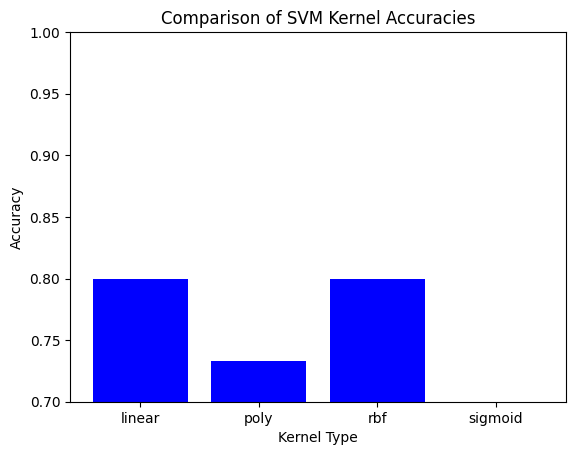

In [7]:
# Plotting the accuracies for different kernels
plt.bar(results.keys(), results.values(), color='blue')
plt.xlabel('Kernel Type')
plt.ylabel('Accuracy')
plt.title('Comparison of SVM Kernel Accuracies')
plt.ylim([0.7, 1])
plt.show()

In [9]:
# Range of C values to explore
C_values = [0.01, 0.1, 1, 10, 100]
# Kernel type for experimentation
kernel_type = 'linear' # You can change this to 'linear' or 'poly'
# Dictionary to store accuracy for each value of C
accuracy_scores = {}
for C_val in C_values:
 # Create a SVM Classifier with varying C values
 svm_model = SVC(kernel=kernel_type, C=C_val)

 # Train the model using the training sets
 svm_model.fit(X_train, y_train)

 # Predict the response for test dataset
 y_pred = svm_model.predict(X_test)

 # Store accuracy in the dictionary
 accuracy_scores[C_val] = accuracy_score(y_test, y_pred)
 print(f"C={C_val} - Accuracy: {accuracy_scores[C_val]}")

C=0.01 - Accuracy: 0.4
C=0.1 - Accuracy: 0.8222222222222222
C=1 - Accuracy: 0.8
C=10 - Accuracy: 0.8
C=100 - Accuracy: 0.8


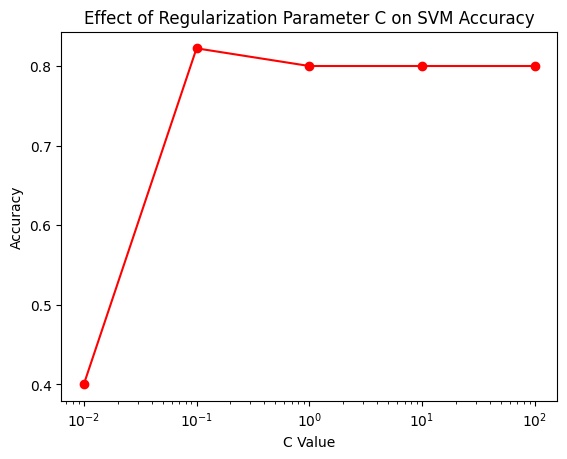

In [12]:
# Plotting the accuracies for different values of C
plt.plot(accuracy_scores.keys(), accuracy_scores.values(), marker='o',
linestyle='-', color='r')
plt.xlabel('C Value')
plt.ylabel('Accuracy')
plt.title('Effect of Regularization Parameter C on SVM Accuracy')
plt.xscale('log') # Since C values vary exponentially, log scale provides better visualization
plt.show()